# EDA

If you are consulting an automobile company, you are trying to understand the factors that influence the sale price of the cars. Specifically, which factors drive the price showing different aspect of analysis



In [28]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [73]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, zscore, shapiro
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline




## **Reading and understanding our data**


 we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.

Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.

In [30]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can find more information about the features and types using the `info()`  method.


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

According to the output above, we have 205 entries or rows, as well as 26 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 205 then there is no missing values for that particular feature. The 'price' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (8 int64 and 8 float64) and object data types (10 object).

The `describe()` function will provide the statistical information about all numeric values.


In [32]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## **Data Cleaning and Wrangling**

Here, we will check if we have any missing values.

In [33]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Also, check for any duplicates by running `duplicated()` function through 'car_ID' records, since each row has a unique car ID value.


In [34]:
sum(data.duplicated(subset = 'car_ID')) == 0

True

Next, let's look into some of our object variables first. Using `unique()` function, we will describe all categories of the 'CarName' attribute.

In [35]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We can see that the 'CarName' includes both the company name (brand) and the car model. Next, we want to split a company name from the model of a car, as for our model building purpose, we will focus on a company name only.


In [36]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()
#data.CarName.str.split(' ')  split it in list like [alfa-romero, giulia]


Let's view all the `unique()` brands now.

In [37]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some typos in the names of the cars, so they should be corrected.


In [38]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

In [39]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let's plot and sort the total number of Brands.


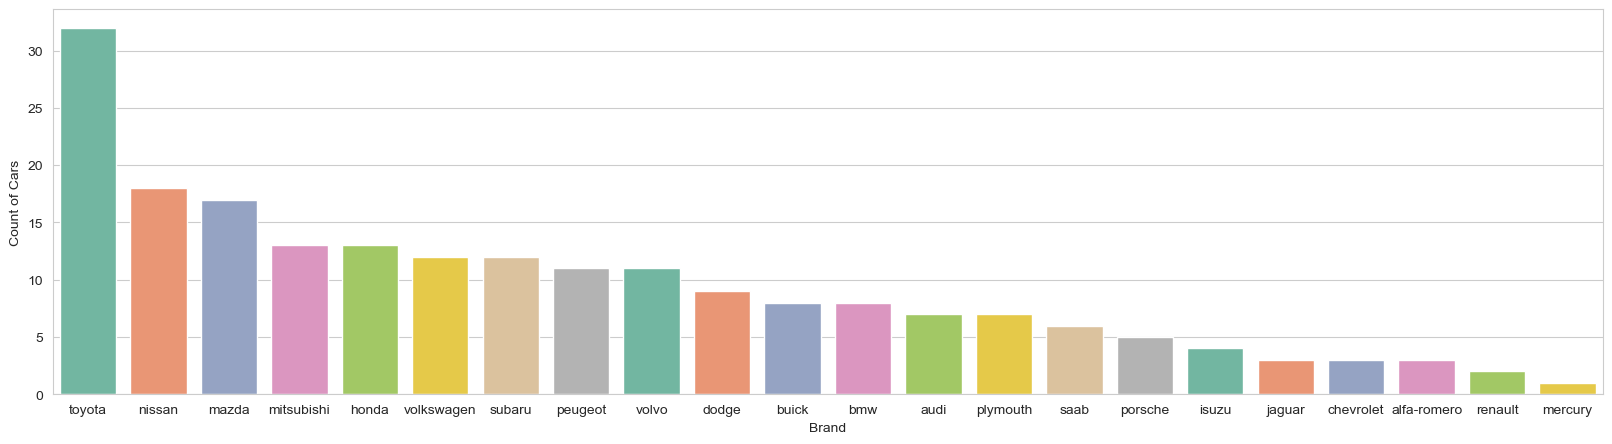

<Figure size 640x480 with 0 Axes>

In [86]:
palette = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize = (20,5))
plt1 = sns.countplot(x=data['brand'], order=pd.value_counts(data['brand']).index,palette=palette)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

We can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.

In [41]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'.


## **Exploratory Data Analysis**



Numerical analysis

In [43]:
data_comp_avg_price = data[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})

In [44]:
data = data.merge(data_comp_avg_price, on = 'brand')

We will now check the statistics of our average car price per car brand

In [45]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [46]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

<Axes: xlabel='price', ylabel='Count'>

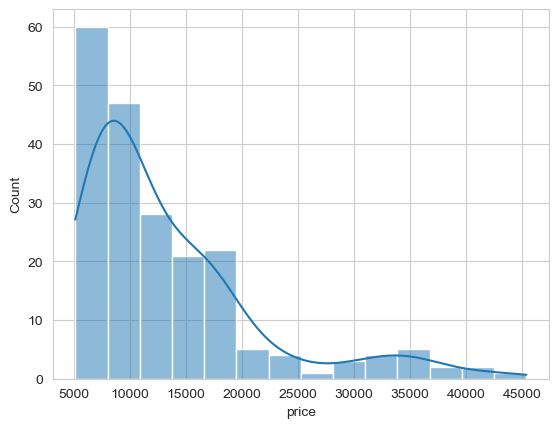

In [89]:
palette = sns.color_palette("Set2")
sns.histplot(data.price,kde=True,palette=palette)

<Axes: xlabel='carheight', ylabel='Count'>

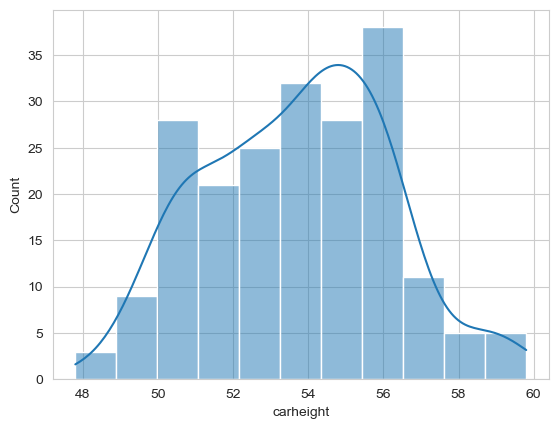

In [88]:
palette = sns.color_palette("Set2")
sns.histplot(data.carheight,kde=True,palette=palette)

In [75]:
skewness = skew(data['carheight'])
kurt = kurtosis(data['carheight'])
print(f"Skewness: {skewness}, Kurtosis: {kurt}")


Skewness: 0.06265991683394276, Kurtosis: -0.46218755571934844


* The data is almost perfectly symmetrical (no significant skewness).
* The distribution is slightly flat, meaning there are fewer outliers or extreme values than a normal distribution would typically have.

In [77]:
stat, p = shapiro(data['carheight'])
print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p}")

Shapiro-Wilk Test: Statistics=0.9842308541999559, p-value=0.021672595956741057


Although the skewness and kurtosis indicated a fairly symmetrical distribution, the Shapiro-Wilk test suggests that the data deviates slightly from normality. This could mean there are subtle irregularities that are not captured by skewness and kurtosis alone, such as mild deviations in the tails or some other characteristics that make the distribution not perfectly normal.

List of Categorical Variables:

*   brand_category
*   fueltype
*   enginetype
*   carbody
*   doornumber
*   enginelocation
*   fuelsystem
*   cylindernumber
*   aspiration
*   drivewheel

We will use the `boxplot()` function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the price.


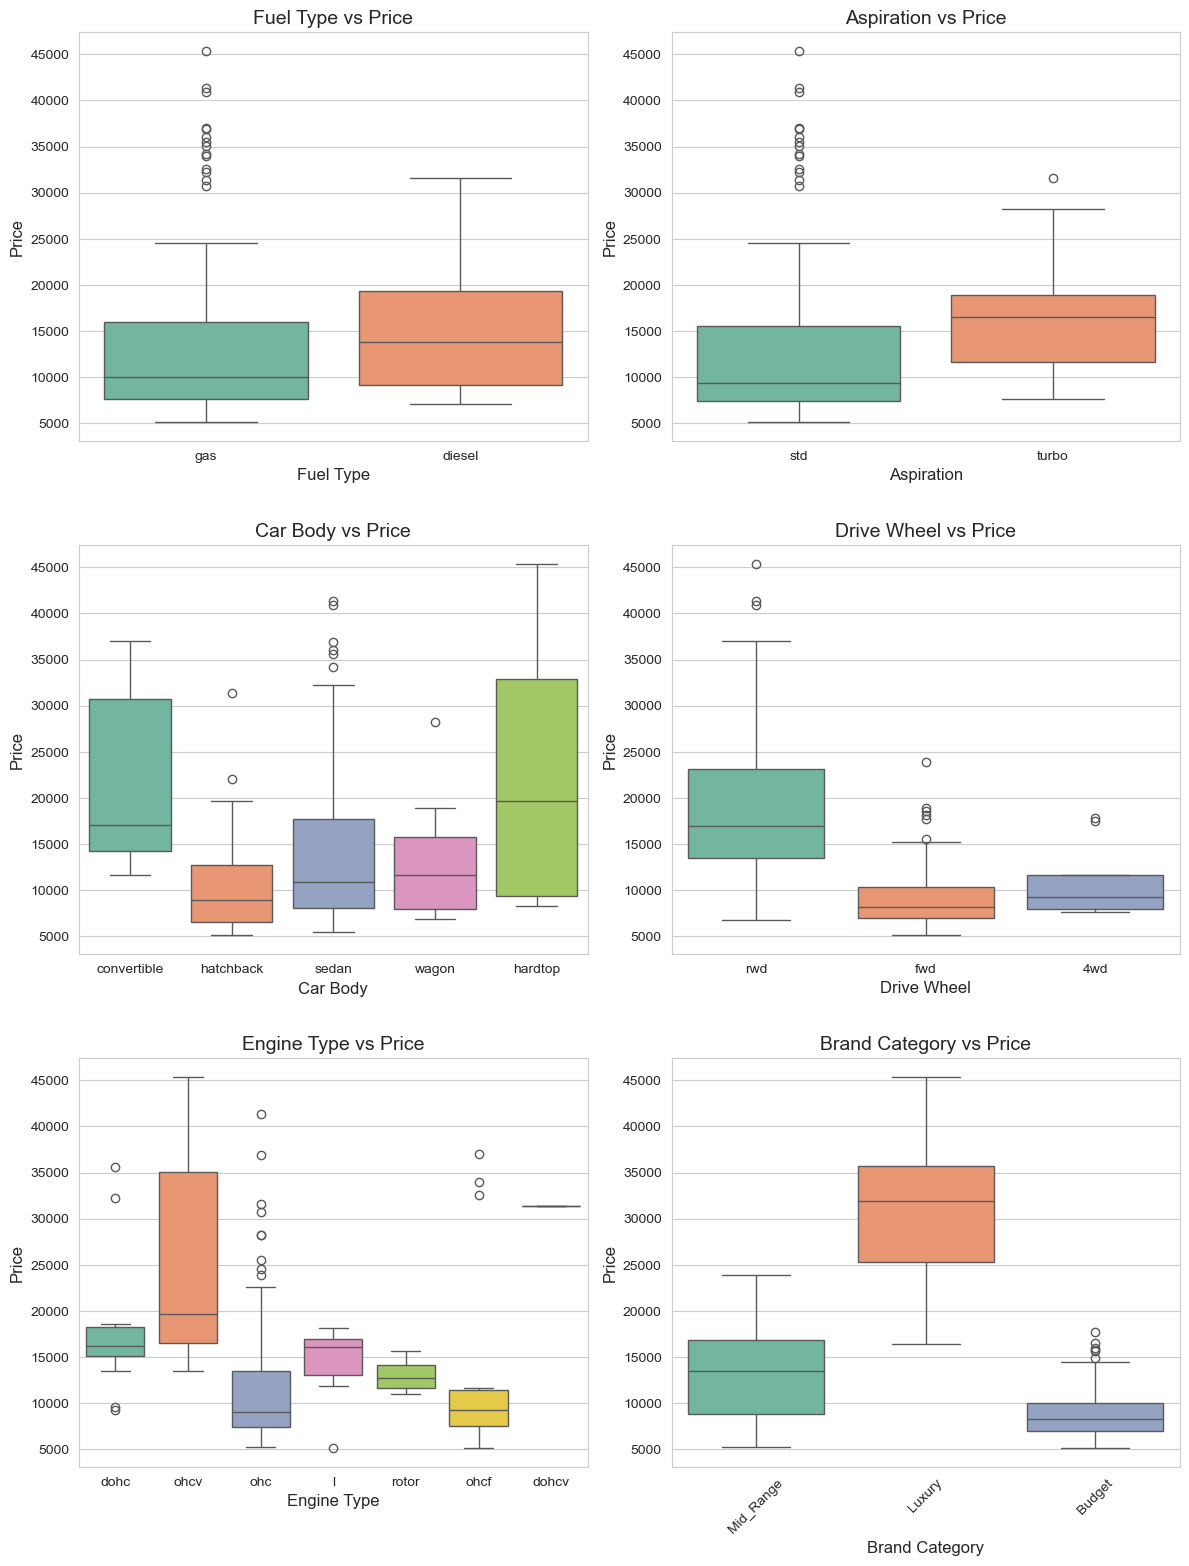

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 20))

palette = sns.color_palette("Set2")

#Fuel Type vs Price
plt.subplot(4, 2, 1)
sns.boxplot(x='fueltype', y='price', data=data, palette=palette)
plt.title('Fuel Type vs Price', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price', fontsize=12)

#Aspiration vs Price
plt.subplot(4, 2, 2)
sns.boxplot(x='aspiration', y='price', data=data, palette=palette)
plt.title('Aspiration vs Price', fontsize=14)
plt.xlabel('Aspiration', fontsize=12)
plt.ylabel('Price', fontsize=12)

#  Car Body vs Price
plt.subplot(4, 2, 3)
sns.boxplot(x='carbody', y='price', data=data, palette=palette)
plt.title('Car Body vs Price', fontsize=14)
plt.xlabel('Car Body', fontsize=12)
plt.ylabel('Price', fontsize=12)

#  Drive Wheel vs Price
plt.subplot(4, 2, 4)
sns.boxplot(x='drivewheel', y='price', data=data, palette=palette)
plt.title('Drive Wheel vs Price', fontsize=14)
plt.xlabel('Drive Wheel', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Engine Type vs Price
plt.subplot(4, 2, 5)
sns.boxplot(x='enginetype', y='price', data=data, palette=palette)
plt.title('Engine Type vs Price', fontsize=14)
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Brand Category vs Price
plt.subplot(4, 2, 6)
sns.boxplot(x='brand_category', y='price', data=data, palette=palette)
plt.title('Brand Category vs Price', fontsize=14)
plt.xlabel('Brand Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()


Next, let's view the list of top features that have high correlation coefficient. The `corr()` function calculates the Pearson'r correlation coefficients with respect to the 'price'.


We can see the how much car is produced by different companies

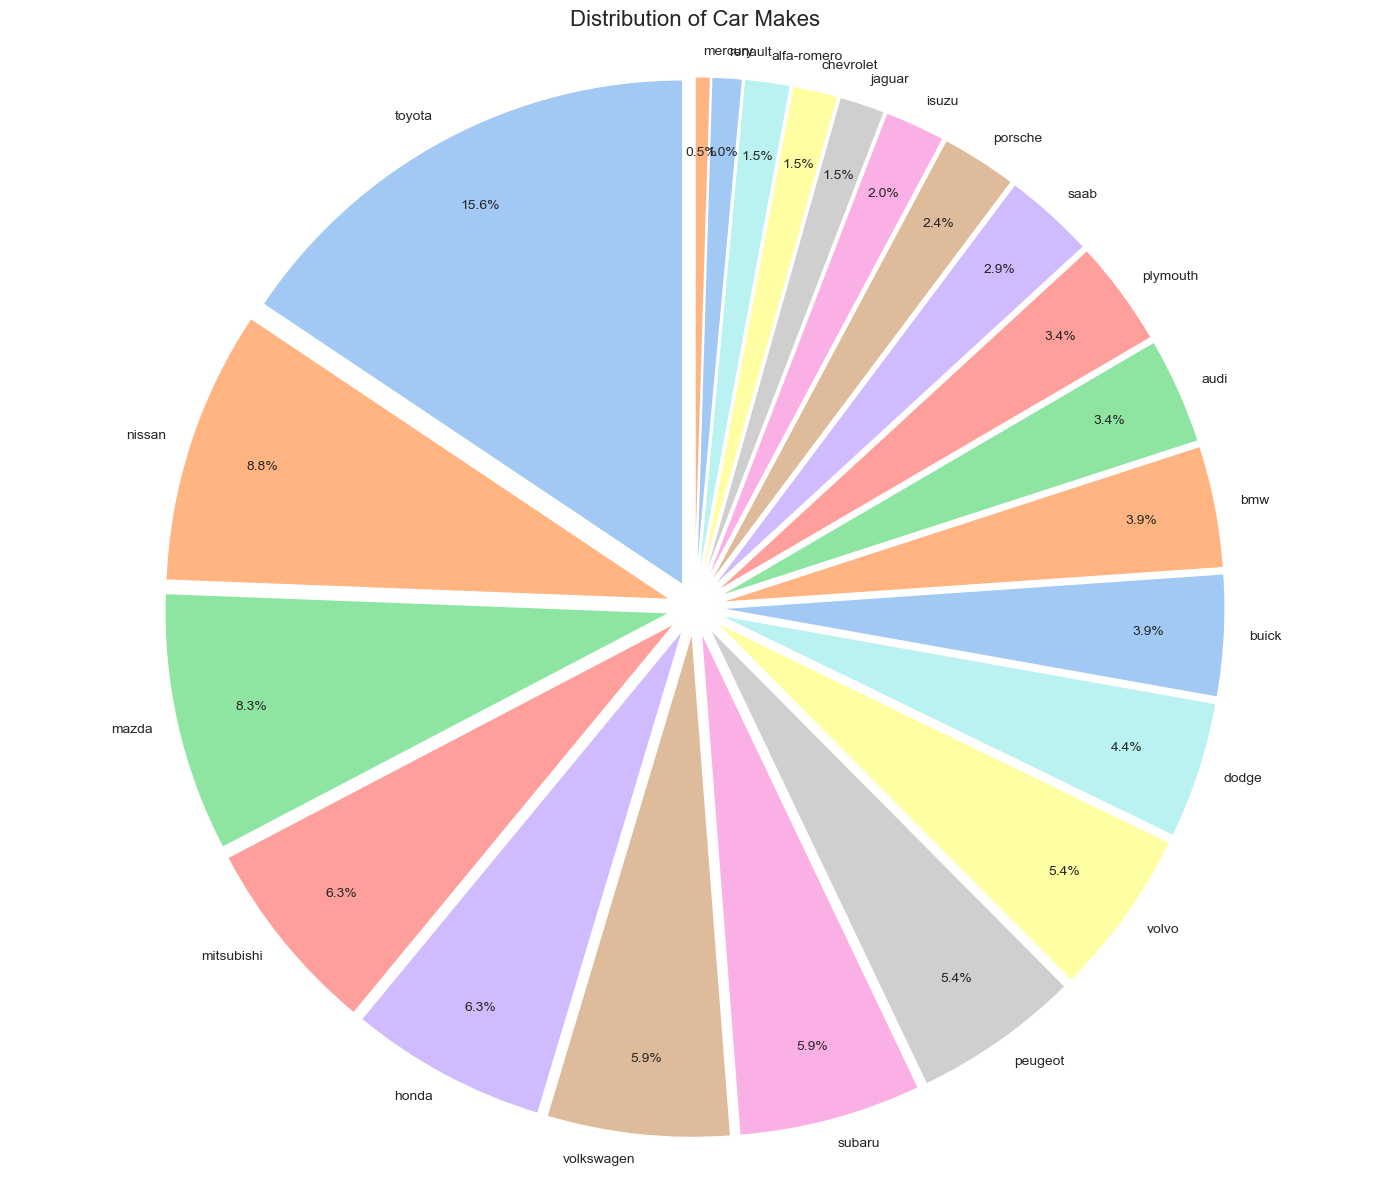

In [92]:
car_make_counts = data['brand'].value_counts()
fig, ax = plt.subplots(figsize=(14, 12))
colors = sns.color_palette('pastel', len(car_make_counts))

explode = [0.05] * len(car_make_counts) 
ax.pie(
    car_make_counts, 
    labels=car_make_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=colors, 
    explode=explode,  
    pctdistance=0.85, 
    labeldistance=1.05 
)

ax.axis('equal')  
ax.set_title('Distribution of Car Makes', fontsize=16)  
plt.tight_layout()
plt.show()


## Multivariate Analysis

In [52]:
corr_matrix = data.select_dtypes(exclude=['object']).corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

These are strongly correlated numerical features with Car Price.


We can also use the `heatmap()` or `pairplot()` to further explore the relationship between all features and the target variables.


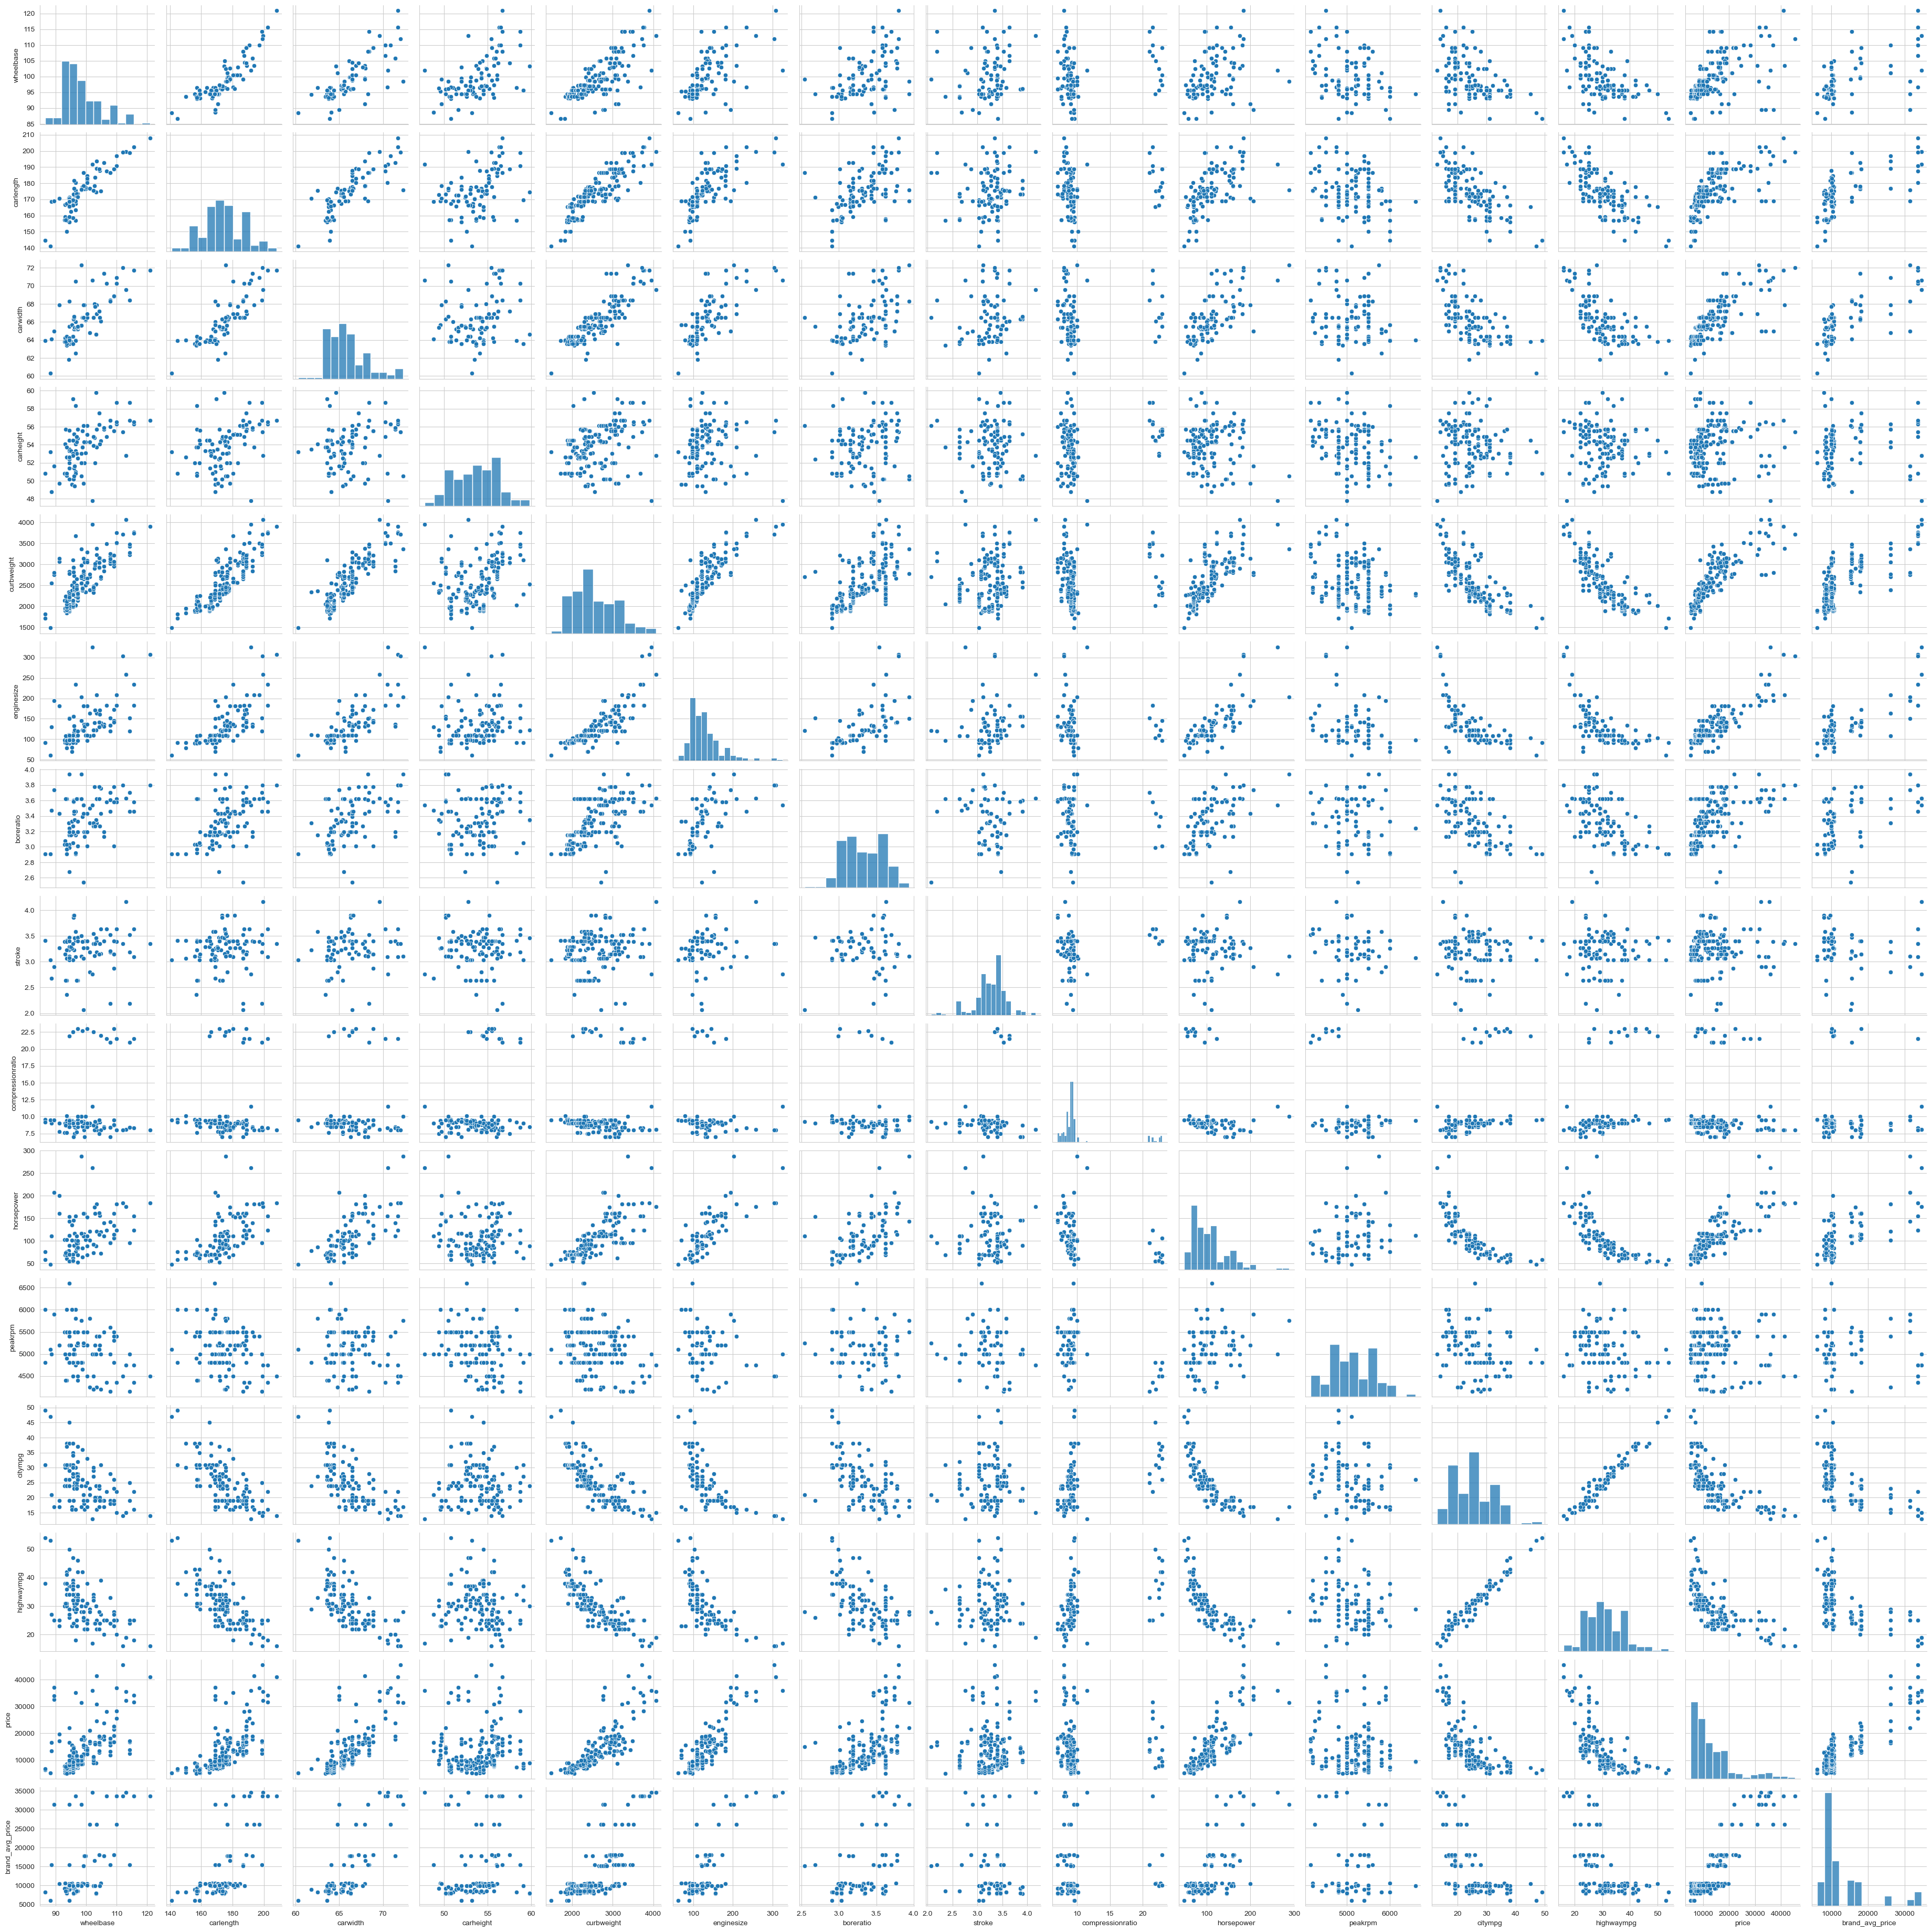

In [97]:
sns.pairplot(data,palette=palette)
plt.show()

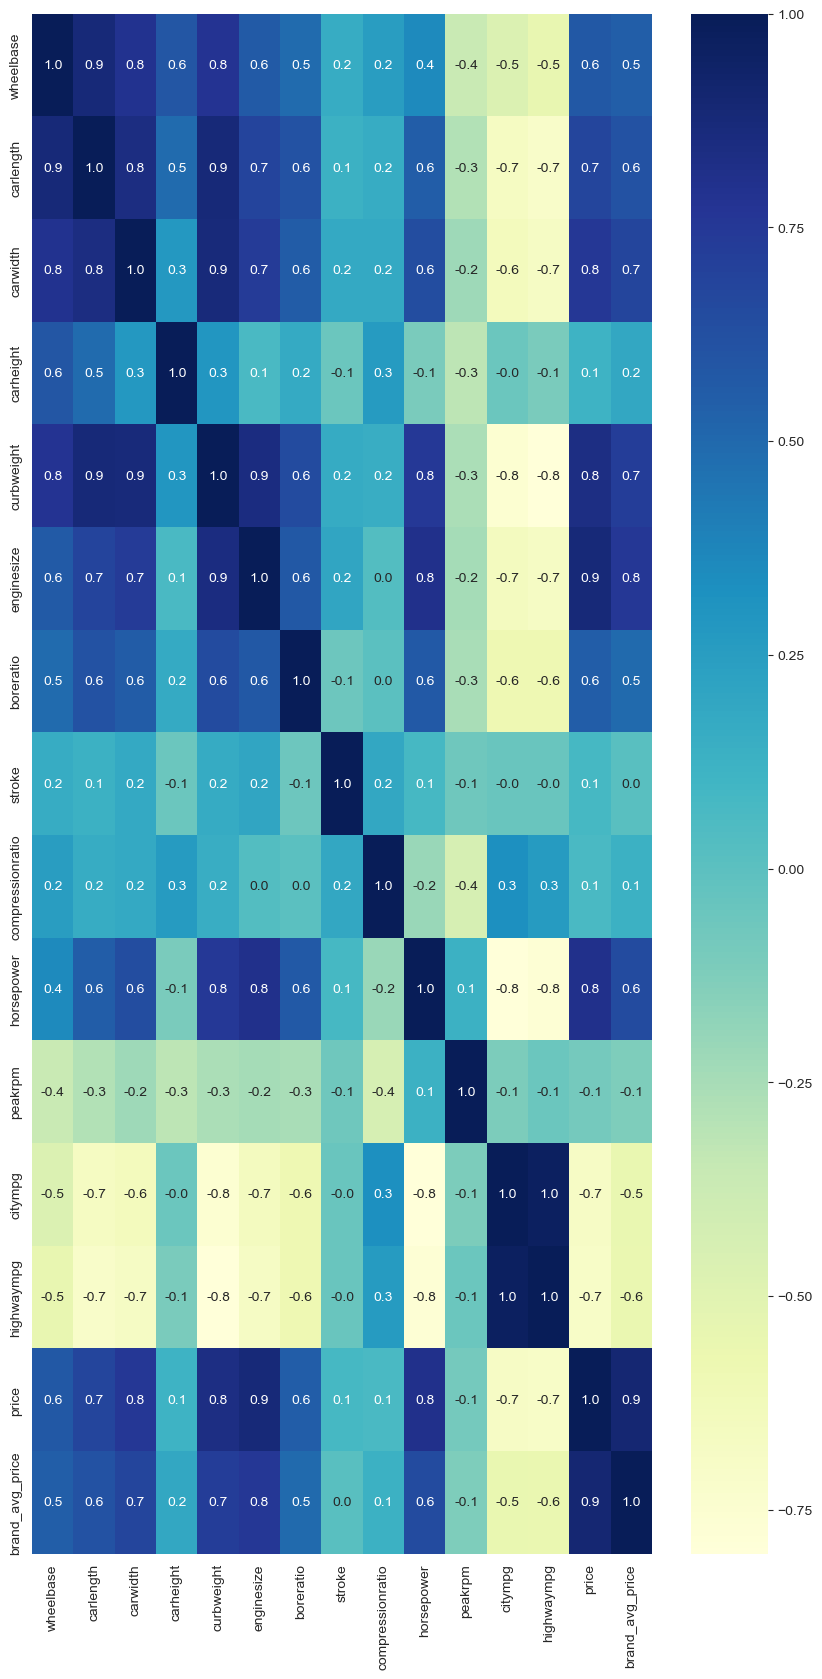

In [100]:
plt.figure(figsize=(10, 20))
sns.heatmap(data.select_dtypes(exclude=['object']).corr(), annot=True,fmt=".1f",cmap='YlGnBu')
plt.show()

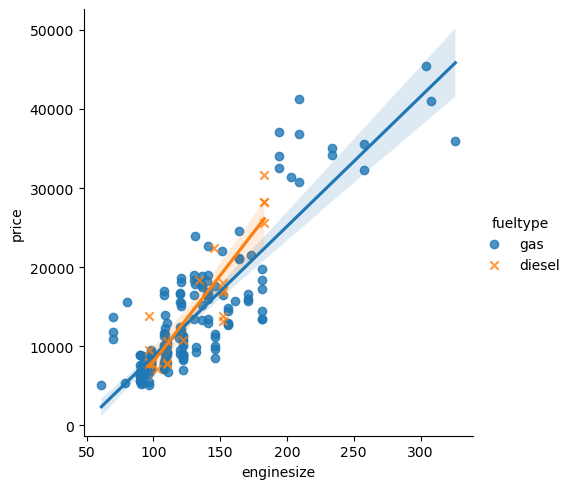

In [82]:
sns.lmplot(x="enginesize", y="price", hue="fueltype", data=data,
           markers=["o", "x"]);

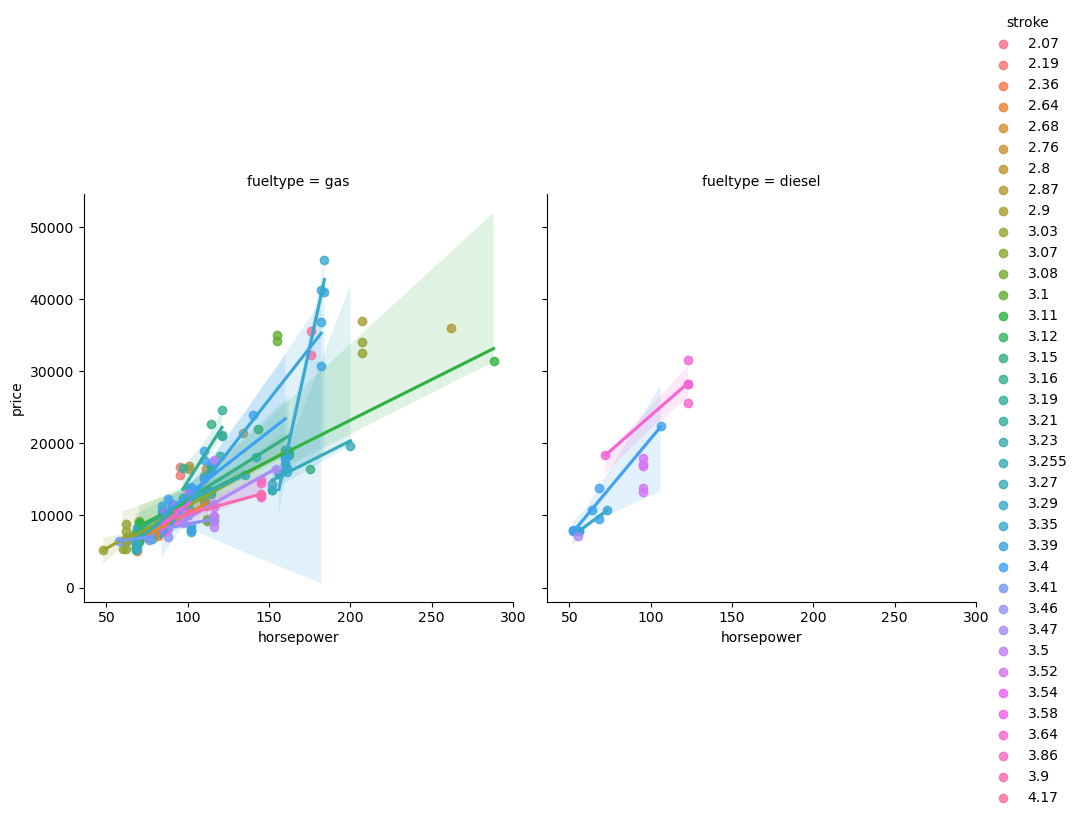

In [83]:
sns.lmplot(x="horsepower", y="price", hue="stroke",col='fueltype', data=data)

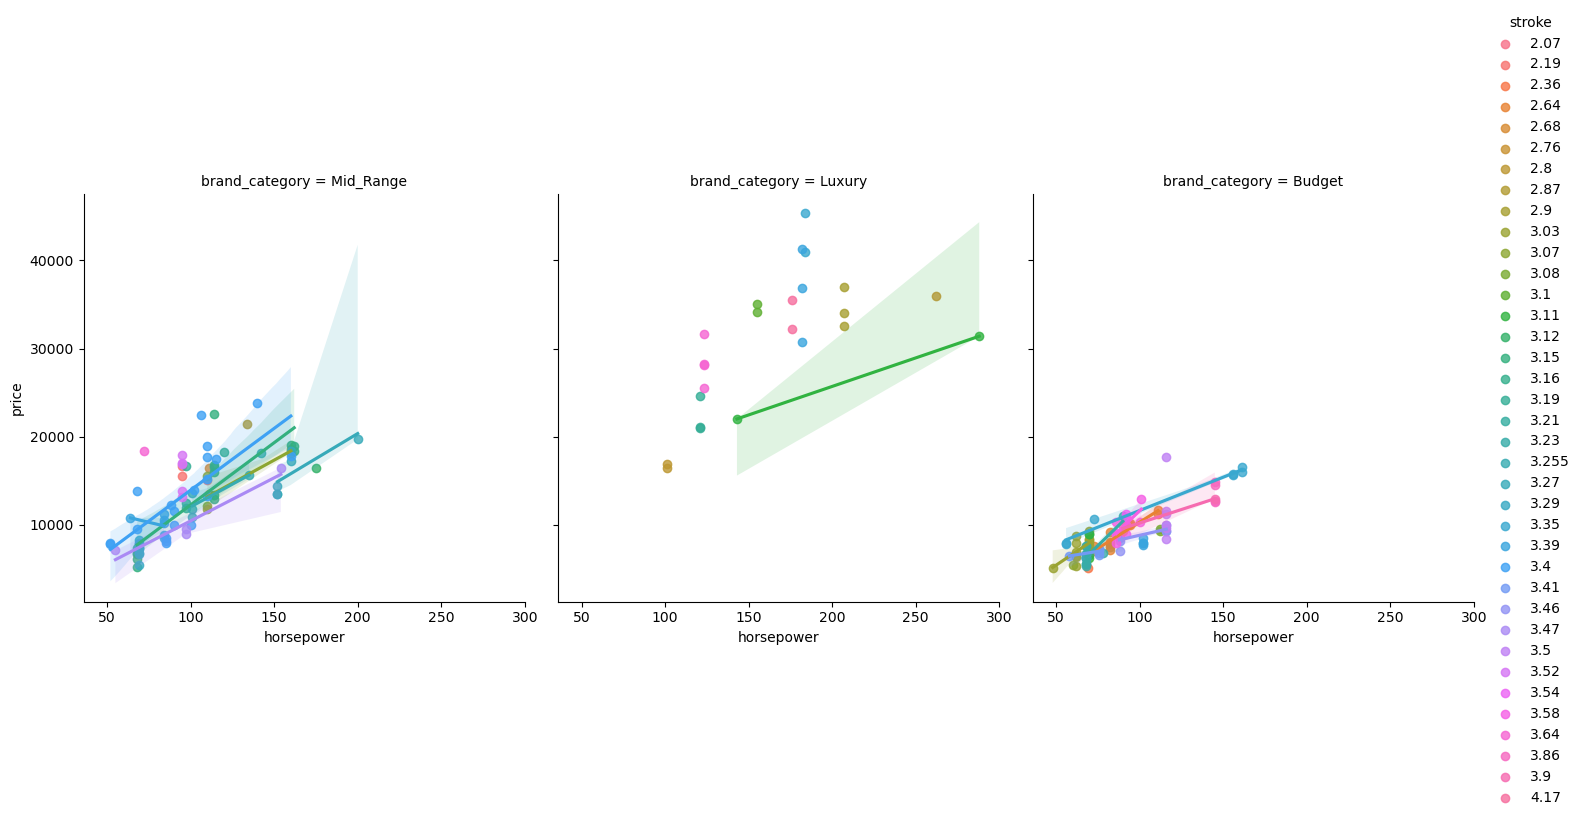

In [81]:
sns.lmplot(x="horsepower", y="price", hue="stroke",col='brand_category', data=data)

By doing similar visulaization , we can see more exploration out of this data.